<a href="https://colab.research.google.com/github/GNunes-br/nlp_sentiment_analysis_pt2/blob/main/Machine_Learning_para_classificar_textos_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
driveSource = '/content/drive/MyDrive/Colab Notebooks/datasets'

# Dados textuais, classificação e exploração

In [ ]:
dataset = pd.read_csv(driveSource + "/imdb_pt_br.csv")

In [ ]:
dataset

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [ ]:
dataset.sentiment.unique()

array(['neg', 'pos'], dtype=object)

In [ ]:
dataset.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [ ]:
classification = dataset.sentiment.replace(['neg', 'pos'], [0,1])
dataset["classif"] = classification

In [ ]:
dataset.head()

,id,text_en,text_pt,sentiment,classif
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [ ]:
dataset.tail()

,id,text_en,text_pt,sentiment,classif
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


# Bag of Words: criando representações da linguagem humana.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
texts = ["Assisti um filme ótimo", "Assisti um filme ruim"]

In [ ]:
vectorizer = CountVectorizer(lowercase=False)
bagOfWords = vectorizer.fit_transform(texts)

In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [ ]:
sparseMatrix = pd.DataFrame.sparse.from_spmatrix(bagOfWords, columns=vectorizer.get_feature_names())

sparseMatrix

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [ ]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bagOfWords = vectorizer.fit_transform(dataset.text_pt)

print(bagOfWords.shape)

(49459, 50)


In [ ]:
sparseMatrix = pd.DataFrame.sparse.from_spmatrix(bagOfWords, columns=vectorizer.get_feature_names())

sparseMatrix.iloc[:1]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Eu,ao,apenas,as,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,...,1,1,0,0,0,1,0,3,2,0


In [ ]:
dataset.text_pt[0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test, trainClass, testClass = train_test_split(bagOfWords, dataset["classif"], random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegression = LogisticRegression()
logisticRegression.fit(train, trainClass)

acuracy = logisticRegression.score(test, testClass)
print(acuracy)

0.6583097452486858


In [ ]:
def classifText(dataframe, textColumn, classifColumn):
  vectorizer = CountVectorizer(lowercase=False, max_features=50)
  bagOfWords = vectorizer.fit_transform(dataframe[textColumn])

  train, test, trainClass, testClass = train_test_split(bagOfWords, dataframe[classifColumn], random_state=42)

  logisticRegression = LogisticRegression()
  logisticRegression.fit(train, trainClass)

  return logisticRegression.score(test, testClass)

In [ ]:
print(classifText(dataset, 'text_pt', 'classif'))

0.6583097452486858


# Visualizando os dados com WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
allWords = ' '.join([text for text in dataset.text_pt])

len(allWords)

63448424

In [ ]:
wordCloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(allWords)

In [ ]:
import matplotlib.pyplot as plt

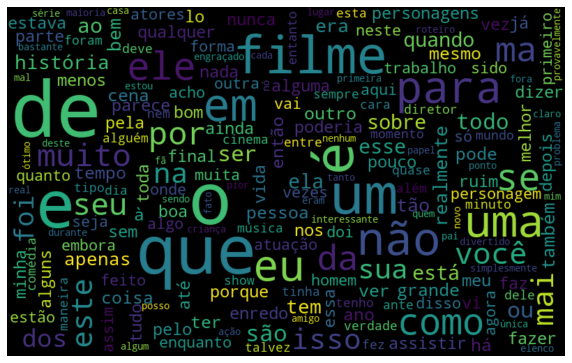

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dataset.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classif
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [ ]:
def genWordCloud(dataframe, textColumn):
  allWords = ' '.join([text for text in dataframe[textColumn]])

  wordCloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(allWords)

  plt.figure(figsize=(10,7))
  plt.imshow(wordCloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

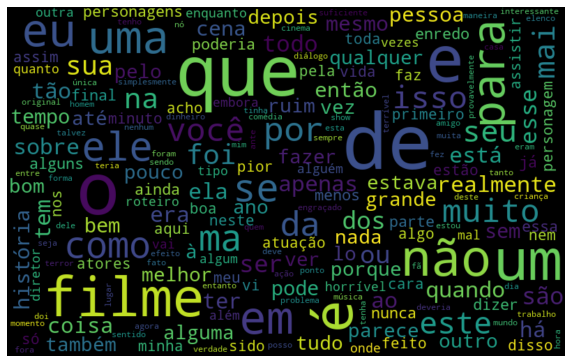

In [ ]:
genWordCloud(dataset.query("sentiment == 'neg'"), 'text_pt')

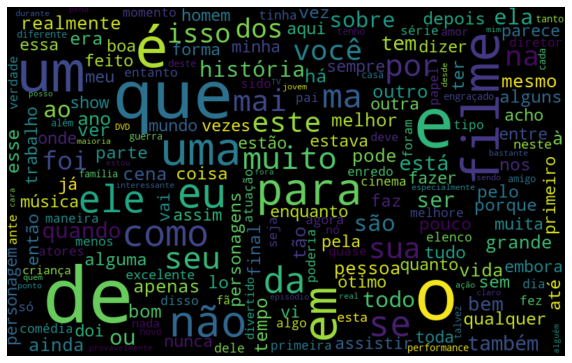

In [ ]:
genWordCloud(dataset.query("sentiment == 'pos'"), 'text_pt')

# Tokenização e a bliblioteca NLTK

In [ ]:
import nltk

In [ ]:
textExample = ['um filme ruim', 'um filme bom']

frequency = nltk.FreqDist(textExample)

frequency

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [ ]:
from nltk import tokenize

In [ ]:
textExample = 'Bem-vindo ao mundo do PLN'

spaceToken = tokenize.WhitespaceTokenizer()

textToken = spaceToken.tokenize(textExample)

textToken

['Bem-vindo', 'ao', 'mundo', 'do', 'PLN']

In [ ]:
frequency = nltk.FreqDist(textToken)

frequency

FreqDist({'Bem-vindo': 1, 'ao': 1, 'mundo': 1, 'do': 1, 'PLN': 1})

In [ ]:
allWordsToken = tokenize.WhitespaceTokenizer().tokenize(allWords)

frequency = nltk.FreqDist(allWordsToken)

frequency

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [ ]:
dfWordsFrequecy = pd.DataFrame({ 'word': list(frequency.keys()), 'freq': list(frequency.values()) })

dfMostWordsFrequecy = dfWordsFrequecy.nlargest(columns='freq', n=10)

dfMostWordsFrequecy

,word,freq
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


# Uma nova visualização e os stop words

In [ ]:
import seaborn as sns

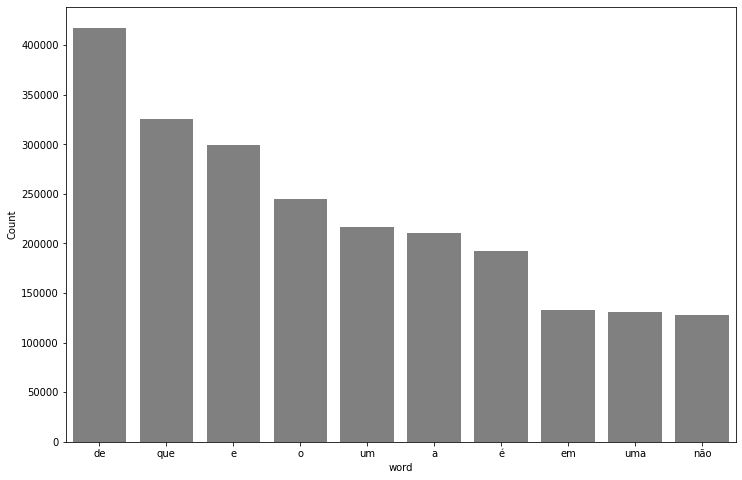

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfMostWordsFrequecy, x='word', y='freq', color='gray')
ax.set(ylabel='Count')
plt.show()

In [ ]:
def pareto(dataframe, textColumn, n):

  allWords = ' '.join([text for text in dataframe[textColumn]])
  allWordsToken = tokenize.WhitespaceTokenizer().tokenize(allWords)
  frequency = nltk.FreqDist(allWordsToken)
  
  dfWordsFrequecy = pd.DataFrame({ 'word': list(frequency.keys()), 'freq': list(frequency.values()) })
  dfMostWordsFrequecy = dfWordsFrequecy.nlargest(columns='freq', n=n)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=dfMostWordsFrequecy, x='word', y='freq', color='gray')
  ax.set(ylabel='Count')
  plt.show()

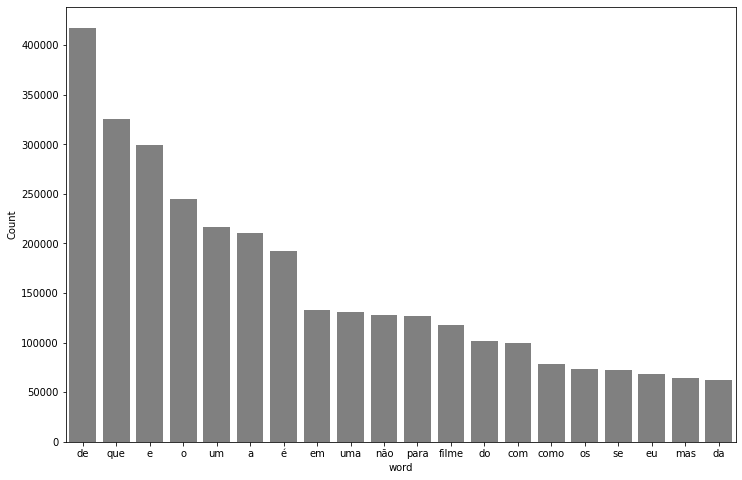

In [ ]:
pareto(dataset, 'text_pt', 20)

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
stopWords = nltk.corpus.stopwords.words('portuguese')

print(stopWords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [ ]:
firstStepPhrase = list();

for text in dataset.text_pt:
  newPhrase = list()
  textWords = tokenize.WhitespaceTokenizer().tokenize(text)

  for word in textWords:
    if word not in stopWords:
      newPhrase.append(word)

  firstStepPhrase.append(' '.join(newPhrase))

In [ ]:
dataset['first_step'] = firstStepPhrase

In [ ]:
dataset.head()

,id,text_en,text_pt,sentiment,classif,first_step
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [ ]:
classifText(dataset, 'first_step', 'classif')

0.6811160533764659

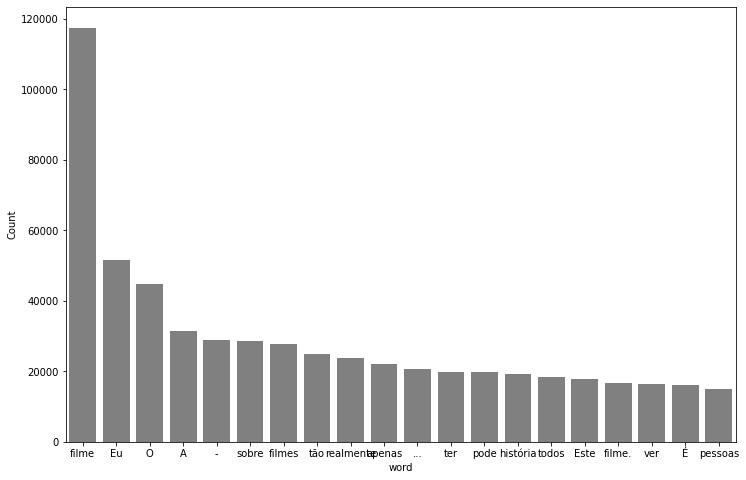

In [ ]:
pareto(dataset, 'first_step', 20)

# Melhorando a visualização do pareto

In [ ]:
from nltk import tokenize

In [ ]:
phrase = 'Olá mundo!'

punctuationToken = tokenize.WordPunctTokenizer()

phraseToken = punctuationToken.tokenize(phrase)

phraseToken

['Olá', 'mundo', '!']

In [ ]:
from string import punctuation

In [ ]:
punctuationList = list()

for value in punctuation:
  punctuationList.append(value)

In [ ]:
punctuationList

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
punctuationStopWords = punctuationList + stopWords

In [ ]:
print(punctuationStopWords)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'h

In [ ]:
secondStepPhrase = list();

for text in dataset.first_step:
  newPhrase = list()
  textWords = tokenize.WordPunctTokenizer().tokenize(text)

  for word in textWords:
    if word not in punctuationStopWords:
      newPhrase.append(word)

  secondStepPhrase.append(' '.join(newPhrase))

In [ ]:
dataset['second_step'] = secondStepPhrase

In [ ]:
dataset.head()

,id,text_en,text_pt,sentiment,classif,first_step,second_step
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [ ]:
classifText(dataset, 'second_step', 'classif')

0.6892033966841893

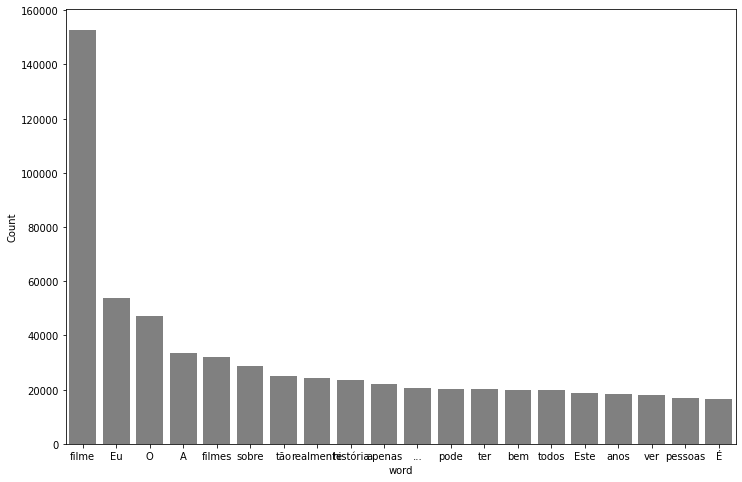

In [ ]:
pareto(dataset, 'second_step', 20)

# Normalização de textos

In [ ]:
!pip install unidecode

import unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 6.3 MB/s eta 0:00:00


In [ ]:
accents = "ótimo péssimo não é tão"

test = unidecode.unidecode(accents)

test

'otimo pessimo nao e tao'

In [ ]:
textWithoutAccents = [unidecode.unidecode(text) for text in dataset.second_step]

In [ ]:
textWithoutAccents[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
stopWordsWithAccents = [unidecode.unidecode(text) for text in punctuationStopWords]

In [ ]:
print(stopWordsWithAccents)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'a', 'a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'as', 'ate', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'eramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'esta', 'estamos', 'estao', 'estar', 'estas', 'estava', 'estavam', 'estavamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiveramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivessemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'foramos', 'forem', 'formos', 'fosse', 'fossem', 'fossemos', 'fui', 'ha', 'haja', 'hajam', 'hajamos', 'hao', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houvera', 'h

In [ ]:
dataset['third_step'] = textWithoutAccents

In [ ]:
thirdStepPhrase = list();

for text in dataset.third_step:
  newPhrase = list()
  textWords = tokenize.WordPunctTokenizer().tokenize(text)

  for word in textWords:
    if word not in punctuationStopWords:
      newPhrase.append(word)

  thirdStepPhrase.append(' '.join(newPhrase))

In [ ]:
dataset.head()

,id,text_en,text_pt,sentiment,classif,first_step,second_step,third_step
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [ ]:
classifText(dataset, 'third_step', 'classif')

0.6887990295188031

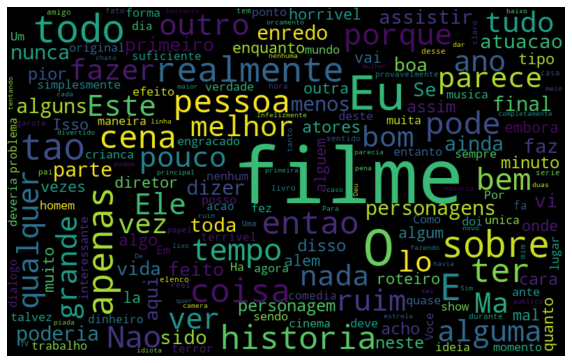

In [ ]:
genWordCloud(dataset.query("sentiment == 'neg'"), 'third_step')

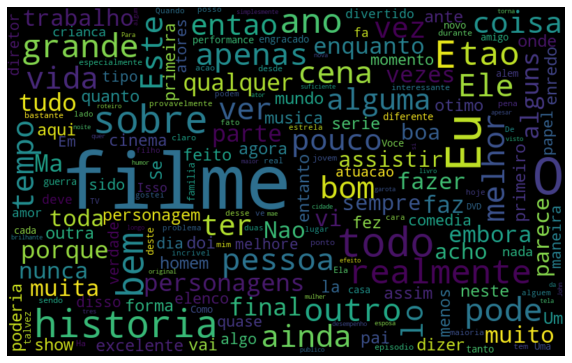

In [ ]:
genWordCloud(dataset.query("sentiment == 'pos'"), 'third_step')

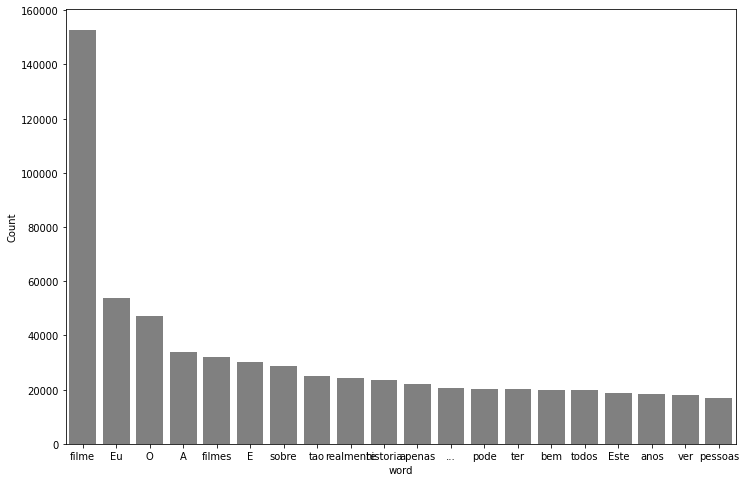

In [ ]:
pareto(dataset, 'third_step', 20)

In [ ]:
phrase = 'O Guilherme é o novo aluno da Alura'

phrase.lower()

'o guilherme é o novo aluno da alura'

In [ ]:
fourthStepPhrase = list();

for text in dataset.third_step:
  newPhrase = list()
  textWords = tokenize.WordPunctTokenizer().tokenize(text.lower())

  for word in textWords:
    if word not in punctuationStopWords:
      newPhrase.append(word)

  fourthStepPhrase.append(' '.join(newPhrase))

In [ ]:
dataset['fourth_step'] = fourthStepPhrase

In [ ]:
dataset.head()

,id,text_en,text_pt,sentiment,classif,first_step,second_step,third_step,fourth_step
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [ ]:
dataset.text_pt[0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [ ]:
dataset.fourth_step[0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
classifText(dataset, 'fourth_step', 'classif')

0.6909017387788111

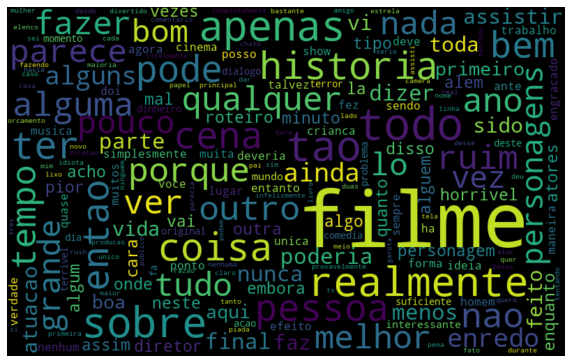

In [ ]:
genWordCloud(dataset.query("sentiment == 'neg'"), 'fourth_step')

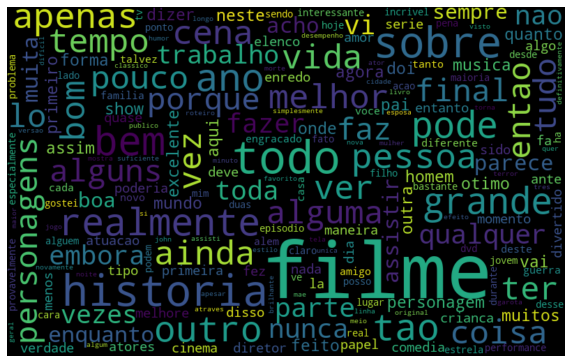

In [ ]:
genWordCloud(dataset.query("sentiment == 'pos'"), 'fourth_step')

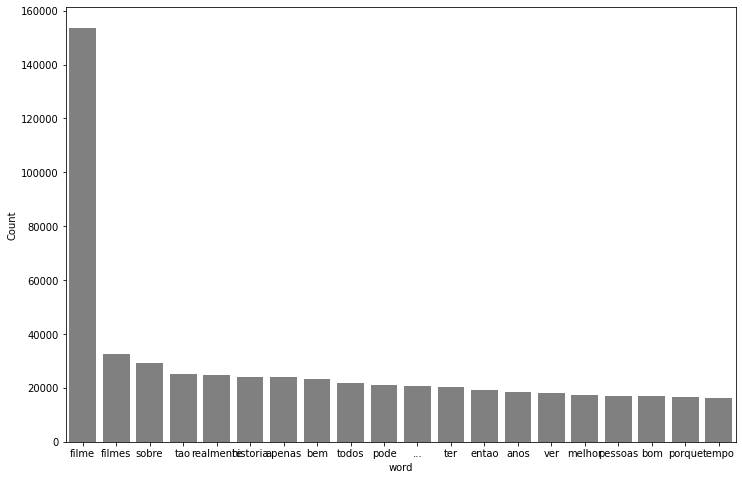

In [ ]:
pareto(dataset, 'fourth_step', 20)

In [ ]:
stemmer = nltk.RSLPStemmer()

stemmer.stem('corredor')

'corr'

In [ ]:
stemmer.stem('corre')

'corr'

In [ ]:
stemmer.stem('correria')

'corr'

In [ ]:
fifthStepPhrase = list();

for text in dataset.fourth_step:
  newPhrase = list()
  textWords = tokenize.WordPunctTokenizer().tokenize(text)

  for word in textWords:
    newPhrase.append(stemmer.stem(word))

  fifthStepPhrase.append(' '.join(newPhrase))

In [ ]:
dataset['fifth_step'] = fifthStepPhrase

In [ ]:
classifText(dataset, 'fifth_step', 'classif')

0.7010109179134655

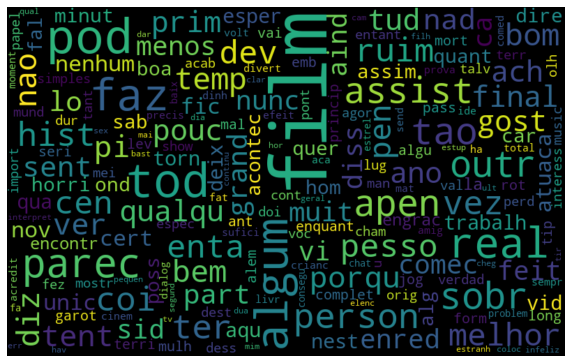

In [ ]:
genWordCloud(dataset.query("sentiment == 'neg'"), 'fifth_step')

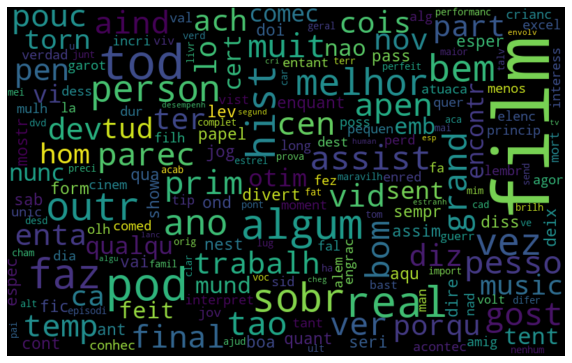

In [ ]:
genWordCloud(dataset.query("sentiment == 'pos'"), 'fifth_step')

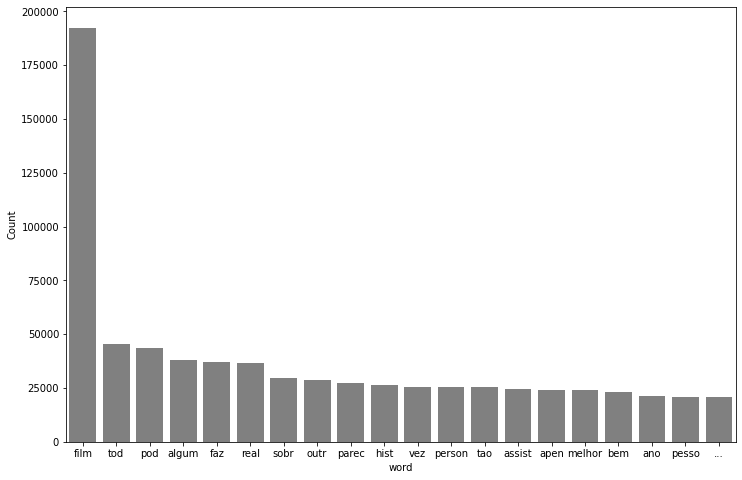

In [ ]:
pareto(dataset, 'fifth_step', 20)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
phrases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

In [ ]:
characters = tfidf.fit_transform(phrases)

In [ ]:
pd.DataFrame(
    characters.todense(),
    columns=tfidf.get_feature_names()
)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [ ]:
grossTfidf = tfidf.fit_transform(dataset.text_pt)

train, test, trainClass, testClass = train_test_split(grossTfidf, dataset["classif"], random_state=42)

In [ ]:
logisticRegression.fit(train, trainClass)

LogisticRegression()

In [ ]:
acuracy = logisticRegression.score(test, testClass)

In [ ]:
acuracy

0.6600889607763849

In [ ]:
fifthSteptfidf = tfidf.fit_transform(dataset.fifth_step)

train, test, trainClass, testClass = train_test_split(fifthSteptfidf, dataset["classif"], random_state=42)

In [ ]:
logisticRegression.fit(train, trainClass)

LogisticRegression()

In [ ]:
acuracy = logisticRegression.score(test, testClass)

In [ ]:
acuracy

0.7024666397088556

In [ ]:
from nltk import ngrams

In [ ]:
text = 'Assiti um ótimo filme.'
textWords = tokenize.WhitespaceTokenizer().tokenize(text)
pairs = ngrams(textWords, 2)
list(pairs)

[('Assiti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))

In [ ]:
tfidfVector = tfidf.fit_transform(dataset.fifth_step)

train, test, trainClass, testClass = train_test_split(tfidfVector, dataset["classif"], random_state=42)

In [ ]:
logisticRegression.fit(train, trainClass)

LogisticRegression()

In [ ]:
acuracy = logisticRegression.score(test, testClass)

In [ ]:
acuracy

0.8858067124949454

In [ ]:
acuracy

0.8858067124949454

In [ ]:
dataframe = pd.DataFrame(
    logisticRegression.coef_[0].T,
    index = tfidf.get_feature_names()
)

dataframe.nlargest(50,0)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
otim,9.900124
excel,8.988801
perfeit,6.890875
maravilh,6.283370
favorit,5.868905
incri,5.756510
divert,5.412203
brilh,4.831588
ador,4.555321
hoj,4.492621


In [ ]:
dataframe.nsmallest(50,0)

,0
ruim,-11.707902
pi,-11.407310
horri,-9.667083
terri,-8.380343
chat,-7.493234
nad,-7.431406
parec,-6.872543
nenhum,-6.258322
tent,-5.952605
mal,-5.676696


In [ ]:
phrases = ['Assisti um filme ótimo']

In [ ]:
characters = tfidf.fit_transform(phrases)

In [ ]:
pd.DataFrame(
    characters.todense(),
    columns=tfidf.get_feature_names()
)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Assisti,Assisti um,filme,filme péssimo,filme ótimo,péssimo,um,um filme,ótimo
0,0.334251,0.334251,0.334251,0.000000,0.469778,0.000000,0.334251,0.334251,0.469778
1,0.334251,0.334251,0.334251,0.469778,0.000000,0.469778,0.334251,0.334251,0.000000


In [ ]:
test

<12365x2433313 sparse matrix of type '<class 'numpy.float64'>'
	with 2626112 stored elements in Compressed Sparse Row format>